In [1]:
# Importing Libraries first

In [2]:
#Importing Common Data Science Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")


# Data Loading 

In [3]:
# read csv file into a DataFrame
#load dataset now

In [4]:
df = pd.read_csv("C:/Users/Akashdeep/Downloads/H2HBABBA2568.csv")
df.head()

df['clear_date'] = pd.to_datetime(df.clear_date)
df['posting_date'] = pd.to_datetime(df.posting_date)
df['due_in_date'] = df['due_in_date'].apply(int)
df['baseline_create_date'] = df['baseline_create_date'].apply(int)
df.head()
# transforming columns 


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT llc,2019-03-01,2019.0,1.928613e+09,2019-01-13,20190111,20190113,20190217,USD,RV,1.0,NaN,95878.89,20190113,NAG2,1.928613e+09,0
1,U001,0200772670,ASSOCIAT systems,2019-05-15,2019.0,1.928940e+09,2019-03-10,20190310,20190310,20190514,USD,RV,1.0,NaN,7852.13,20190310,NAGD,1.928940e+09,0
2,U001,0200744019,TARG co,NaT,2020.0,1.930710e+09,2020-03-27,20200327,20200327,20200411,USD,RV,1.0,NaN,18118.48,20200327,NAA8,1.930710e+09,1
3,U001,0200769623,WAL-MAR corporation,2019-10-25,2019.0,1.930008e+09,2019-10-13,20191013,20191013,20191028,USD,RV,1.0,NaN,3225.75,20191013,NAH4,1.930008e+09,0
4,U001,0200777735,NASH corporation,2019-06-21,2019.0,1.929455e+09,2019-06-07,20190607,20190607,20190622,USD,RV,1.0,NaN,9490.98,20190607,NAA8,1.929455e+09,0


In [5]:
# Checking dataframe

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
df.shape

(50000, 19)

#  Data Preprocessing

In [8]:
### Checking for null columns now

In [9]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [10]:
### Change date columns into datetime data type

In [11]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d').dt.strftime('%Y-%m-%d ')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d').dt.strftime('%Y-%m-%d ')
df['document_create_date_1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

df.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date_1
0,U001,CCCA02,KRAFT llc,2019-03-01,2019.0,1.928613e+09,2019-01-13,2019-01-11,20190113,2019-02-17,USD,RV,1.0,NaN,95878.89,2019-01-13,NAG2,1.928613e+09,0,2019-01-13
1,U001,0200772670,ASSOCIAT systems,2019-05-15,2019.0,1.928940e+09,2019-03-10,2019-03-10,20190310,2019-05-14,USD,RV,1.0,NaN,7852.13,2019-03-10,NAGD,1.928940e+09,0,2019-03-10
2,U001,0200744019,TARG co,NaT,2020.0,1.930710e+09,2020-03-27,2020-03-27,20200327,2020-04-11,USD,RV,1.0,NaN,18118.48,2020-03-27,NAA8,1.930710e+09,1,2020-03-27
3,U001,0200769623,WAL-MAR corporation,2019-10-25,2019.0,1.930008e+09,2019-10-13,2019-10-13,20191013,2019-10-28,USD,RV,1.0,NaN,3225.75,2019-10-13,NAH4,1.930008e+09,0,2019-10-13
4,U001,0200777735,NASH corporation,2019-06-21,2019.0,1.929455e+09,2019-06-07,2019-06-07,20190607,2019-06-22,USD,RV,1.0,NaN,9490.98,2019-06-07,NAA8,1.929455e+09,0,2019-06-07


In [12]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date              object
document_create_date.1             int64
due_in_date                       object
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date              object
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
document_create_date_1            object
dtype: object

In [13]:
# Change date columns into datetime data type
df['due_in_date'] = pd.to_datetime(df.due_in_date)
df['baseline_create_date'] = pd.to_datetime(df.baseline_create_date)
df['document_create_date'] = pd.to_datetime(df.document_create_date)
df['document_create_date.1'] = pd.to_datetime(df.document_create_date_1 )
# extra column created document_created_date_1 which will be removed further
# now columns=20
df['document_create_date_1'] = 0

df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date_1
0,U001,CCCA02,KRAFT llc,2019-03-01,2019.0,1.928613e+09,2019-01-13,2019-01-11,2019-01-13,2019-02-17,USD,RV,1.0,NaN,95878.89,2019-01-13,NAG2,1.928613e+09,0,0
1,U001,0200772670,ASSOCIAT systems,2019-05-15,2019.0,1.928940e+09,2019-03-10,2019-03-10,2019-03-10,2019-05-14,USD,RV,1.0,NaN,7852.13,2019-03-10,NAGD,1.928940e+09,0,0
2,U001,0200744019,TARG co,NaT,2020.0,1.930710e+09,2020-03-27,2020-03-27,2020-03-27,2020-04-11,USD,RV,1.0,NaN,18118.48,2020-03-27,NAA8,1.930710e+09,1,0
3,U001,0200769623,WAL-MAR corporation,2019-10-25,2019.0,1.930008e+09,2019-10-13,2019-10-13,2019-10-13,2019-10-28,USD,RV,1.0,NaN,3225.75,2019-10-13,NAH4,1.930008e+09,0,0
4,U001,0200777735,NASH corporation,2019-06-21,2019.0,1.929455e+09,2019-06-07,2019-06-07,2019-06-07,2019-06-22,USD,RV,1.0,NaN,9490.98,2019-06-07,NAA8,1.929455e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO llc,2019-11-22,2019.0,1.930126e+09,2019-11-08,2019-11-07,2019-11-08,2019-11-23,USD,RV,1.0,NaN,50632.23,2019-11-08,NAA8,1.930126e+09,0,0
49996,U001,0200769623,WAL-MAR llc,2019-10-24,2019.0,1.930009e+09,2019-10-14,2019-10-13,2019-10-14,2019-10-29,USD,RV,1.0,NaN,48481.90,2019-10-14,NAH4,1.930009e+09,0,0
49997,U001,0200769623,WAL-MAR co,2019-08-13,2019.0,1.929697e+09,2019-08-03,2019-08-03,2019-08-03,2019-08-18,USD,RV,1.0,NaN,10281.44,2019-08-03,NAH4,1.929697e+09,0,0
49998,U001,0200769623,WAL-MAR corporation,2019-09-11,2019.0,1.929818e+09,2019-08-31,2019-08-31,2019-08-31,2019-09-15,USD,RV,1.0,NaN,46816.78,2019-08-31,NAH4,1.929818e+09,0,0


In [14]:
df.dtypes


business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
document_create_date_1             int64
dtype: object

In [15]:
df.describe()

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,document_create_date_1
count,50000.000000,5.000000e+04,50000.0,0.0,50000.000000,4.999500e+04,50000.000000,50000.0
mean,2019.303340,2.010248e+09,1.0,NaN,31989.791884,2.009499e+09,0.200000,0.0
std,0.459705,2.837824e+08,0.0,NaN,38678.717242,2.737327e+08,0.400004,0.0
min,2019.000000,1.928502e+09,1.0,NaN,0.170000,1.928502e+09,0.000000,0.0
25%,2019.000000,1.929329e+09,1.0,NaN,4839.677500,1.929329e+09,0.000000,0.0
50%,2019.000000,1.929951e+09,1.0,NaN,17290.630000,1.929951e+09,0.000000,0.0
75%,2020.000000,1.930613e+09,1.0,NaN,46832.040000,1.930612e+09,0.000000,0.0
max,2020.000000,9.500000e+09,1.0,NaN,792766.350000,2.960636e+09,1.000000,0.0


In [16]:
# Cleaning Dataset

In [17]:
# Check for duplicates Rows

In [18]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date_1
451,U001,0200769623,WAL-MAR foundation,2019-10-29,2019.0,1.930007e+09,2019-10-13,2019-10-12,2019-10-13,2019-10-28,USD,RV,1.0,NaN,20767.01,2019-10-13,NAH4,1.930007e+09,0,0
774,U001,0200769623,WAL-MAR co,2019-12-06,2019.0,1.930191e+09,2019-11-26,2019-11-25,2019-11-26,2019-12-11,USD,RV,1.0,NaN,20021.32,2019-11-26,NAH4,1.930191e+09,0,0
1206,U001,0200722444,PERFOR associates,2019-02-08,2019.0,1.928669e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,USD,RV,1.0,NaN,37375.03,2019-01-24,NAA8,1.928669e+09,0,0
2882,U001,0200397082,GENE associates,2019-04-10,2019.0,1.928594e+09,2019-01-08,2019-01-09,2019-01-08,2019-04-08,USD,RV,1.0,NaN,11845.00,2019-01-08,NAVM,1.928594e+09,0,0
3421,CA02,0100009866,BUNZ associates,2019-08-07,2019.0,2.960567e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-02,CAD,RV,1.0,NaN,13138.40,2019-07-23,CA10,2.960567e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49919,U001,200820380,SMITH'S corporation,2019-07-25,2019.0,1.929595e+09,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,RV,1.0,NaN,47646.35,2019-07-10,NAA8,1.929595e+09,0,0
49931,CA02,0140105686,SYSC foundation,2019-09-05,2019.0,2.960573e+09,2019-08-17,2019-08-17,2019-08-17,2019-09-01,CAD,RV,1.0,NaN,15069.00,2019-08-22,CA10,2.960573e+09,0,0
49940,U001,0200776463,KROGE foundation,NaT,2020.0,1.930781e+09,2020-04-13,2020-04-13,2020-04-13,2020-04-28,USD,RV,1.0,NaN,131751.56,2020-04-13,NAA8,1.930781e+09,1,0
49969,U001,0200712187,SPAR associates,NaT,2020.0,1.930644e+09,2020-03-12,2020-03-12,2020-03-12,2020-05-16,USD,RV,1.0,NaN,75017.65,2020-03-12,NAGD,1.930644e+09,1,0


In [19]:
df.duplicated().sum()

1164

In [20]:
#dropping all the null rows
dataFrame=df.drop_duplicates(keep= 'first')
dataFrame.shape


(48836, 20)

In [21]:
# Remove null columns

In [22]:
dataFrame=dataFrame.dropna(how = 'all', axis=1) 
#column removed was area_business
dataFrame.shape

(48836, 19)

In [23]:
# Remove constant columns

In [24]:
# Checking the column which contains different values in rows
nunique = dataFrame.nunique()
nunique

business_code                 6
cust_number                1395
name_customer              4182
clear_date                  396
buisness_year                 2
doc_id                    48836
posting_date                505
document_create_date        505
document_create_date.1      506
due_in_date                 549
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44205
baseline_create_date        508
cust_payment_terms           72
invoice_id                48831
isOpen                        2
document_create_date_1        1
dtype: int64

In [25]:
cols_to_drop = nunique[nunique == 1].index
# column dropped are document_create_date_1 and posting_id
dataFrame=dataFrame.drop(cols_to_drop, axis =1)
dataFrame.shape, dataFrame.dtypes

((48836, 17),
 business_code                     object
 cust_number                       object
 name_customer                     object
 clear_date                datetime64[ns]
 buisness_year                    float64
 doc_id                           float64
 posting_date              datetime64[ns]
 document_create_date      datetime64[ns]
 document_create_date.1    datetime64[ns]
 due_in_date               datetime64[ns]
 invoice_currency                  object
 document type                     object
 total_open_amount                float64
 baseline_create_date      datetime64[ns]
 cust_payment_terms                object
 invoice_id                       float64
 isOpen                             int64
 dtype: object)

#### Check if any columns are duplicate 

In [26]:
#transpose
alt=dataFrame.T
alt

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
business_code,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,...,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001
cust_number,CCCA02,0200772670,0200744019,0200769623,0200777735,0200726979,0200780825,0200820380,0200769623,0200769623,...,0200769623,0100035877,0200769623,0200799367,0200762301,0200561861,0200769623,0200769623,0200769623,0200772670
name_customer,KRAFT llc,ASSOCIAT systems,TARG co,WAL-MAR corporation,NASH corporation,BJ'S in,SYSCO FO us,SMITH'S co,WAL-MAR associates,WAL-MAR systems,...,WAL-MAR trust,DUNKIN us,WAL-MAR systems,MCL co,C&S WH associates,CO llc,WAL-MAR llc,WAL-MAR co,WAL-MAR corporation,ASSOCIAT us
clear_date,2019-03-01 00:00:00,2019-05-15 00:00:00,NaT,2019-10-25 00:00:00,2019-06-21 00:00:00,NaT,2019-11-25 00:00:00,2019-08-22 00:00:00,2019-04-22 00:00:00,2020-02-18 00:00:00,...,2019-01-29 00:00:00,2019-09-11 00:00:00,2019-03-12 00:00:00,NaT,NaT,2019-11-22 00:00:00,2019-10-24 00:00:00,2019-08-13 00:00:00,2019-09-11 00:00:00,NaT
buisness_year,2019.0,2019.0,2020.0,2019.0,2019.0,2020.0,2019.0,2019.0,2019.0,2020.0,...,2019.0,2019.0,2019.0,2020.0,2020.0,2019.0,2019.0,2019.0,2019.0,2020.0
doc_id,1928613109.0,1928939858.0,1930709578.0,1930008451.0,1929455434.0,1930789171.0,1930037334.0,1929707836.0,1929110723.0,1930470802.0,...,1928643238.0,1929769489.0,1928872192.0,1930752882.0,1930834011.0,1930125551.0,1930009210.0,1929697093.0,1929818017.0,1930687620.0
posting_date,2019-01-13 00:00:00,2019-03-10 00:00:00,2020-03-27 00:00:00,2019-10-13 00:00:00,2019-06-07 00:00:00,2020-04-16 00:00:00,2019-10-23 00:00:00,2019-08-07 00:00:00,2019-04-10 00:00:00,2020-02-05 00:00:00,...,2019-01-17 00:00:00,2019-08-27 00:00:00,2019-03-01 00:00:00,2020-04-07 00:00:00,2020-04-29 00:00:00,2019-11-08 00:00:00,2019-10-14 00:00:00,2019-08-03 00:00:00,2019-08-31 00:00:00,2020-03-23 00:00:00
document_create_date,2019-01-11 00:00:00,2019-03-10 00:00:00,2020-03-27 00:00:00,2019-10-13 00:00:00,2019-06-07 00:00:00,2020-04-15 00:00:00,2019-10-21 00:00:00,2019-08-06 00:00:00,2019-04-09 00:00:00,2020-02-03 00:00:00,...,2019-01-17 00:00:00,2019-08-21 00:00:00,2019-02-27 00:00:00,2020-04-06 00:00:00,2020-04-28 00:00:00,2019-11-07 00:00:00,2019-10-13 00:00:00,2019-08-03 00:00:00,2019-08-31 00:00:00,2020-03-23 00:00:00
document_create_date.1,2019-01-13 00:00:00,2019-03-10 00:00:00,2020-03-27 00:00:00,2019-10-13 00:00:00,2019-06-07 00:00:00,2020-04-16 00:00:00,2019-10-23 00:00:00,2019-08-07 00:00:00,2019-04-10 00:00:00,2020-02-05 00:00:00,...,2019-01-17 00:00:00,2019-08-27 00:00:00,2019-03-01 00:00:00,2020-04-07 00:00:00,2020-04-29 00:00:00,2019-11-08 00:00:00,2019-10-14 00:00:00,2019-08-03 00:00:00,2019-08-31 00:00:00,2020-03-23 00:00:00
due_in_date,2019-02-17 00:00:00,2019-05-14 00:00:00,2020-04-11 00:00:00,2019-10-28 00:00:00,2019-06-22 00:00:00,2020-05-01 00:00:00,2019-11-24 00:00:00,2019-08-22 00:00:00,2019-04-25 00:00:00,2020-02-20 00:00:00,...,2019-02-01 00:00:00,2019-09-11 00:00:00,2019-03-16 00:00:00,2020-04-22 00:00:00,2020-05-14 00:00:00,2019-11-23 00:00:00,2019-10-29 00:00:00,2019-08-18 00:00:00,2019-09-15 00:00:00,2020-04-07 00:00:00


In [27]:
#Checking duplicates rows
alt[alt.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999


In [28]:
#total duplicates rows
alt.duplicated().sum()

0

In [29]:
#Transforming to original form
alt=alt.drop_duplicates(keep='first')
dataFrame=alt.T
dataFrame.shape

(48836, 17)

## Split on the basis of clear date

In [30]:
### More Pre Processing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from datetime import datetime


In [32]:
# In tain data clear date is not  null and isOpen=0 i.e invoice closed we have to derive relation for prdiction
#splitting the data set which we have to find into test and train sets

In [33]:
# We can also split using stratify
x_train=dataFrame[dataFrame['isOpen']==0].copy()
X=dataFrame[dataFrame['isOpen']==1].copy()
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT llc,2019-03-01,2019.0,1928613109.0,2019-01-13,2019-01-11,2019-01-13,2019-02-17,USD,RV,95878.89,2019-01-13,NAG2,1928613109.0,0
1,U001,0200772670,ASSOCIAT systems,2019-05-15,2019.0,1928939858.0,2019-03-10,2019-03-10,2019-03-10,2019-05-14,USD,RV,7852.13,2019-03-10,NAGD,1928939858.0,0
3,U001,0200769623,WAL-MAR corporation,2019-10-25,2019.0,1930008451.0,2019-10-13,2019-10-13,2019-10-13,2019-10-28,USD,RV,3225.75,2019-10-13,NAH4,1930008451.0,0
4,U001,0200777735,NASH corporation,2019-06-21,2019.0,1929455434.0,2019-06-07,2019-06-07,2019-06-07,2019-06-22,USD,RV,9490.98,2019-06-07,NAA8,1929455434.0,0
6,U001,0200780825,SYSCO FO us,2019-11-25,2019.0,1930037334.0,2019-10-23,2019-10-21,2019-10-23,2019-11-24,USD,RV,24180.83,2019-10-23,NA32,1930037334.0,0


### Cleaning


In [34]:
x_train.nunique()

business_code                 6
cust_number                1326
name_customer              3878
clear_date                  396
buisness_year                 2
doc_id                    39144
posting_date                422
document_create_date        424
document_create_date.1      423
due_in_date                 492
invoice_currency              2
document type                 2
total_open_amount         35579
baseline_create_date        432
cust_payment_terms           69
invoice_id                39139
isOpen                        1
dtype: int64

In [35]:
x_train.shape

(39144, 17)

In [36]:
#dropping the columns
Tunique=x_train.nunique()
Tdrop=Tunique[nunique<=2].index
## columns removed from test set are => 'buisness_year', 'invoice_currency', 'document type', 'isOpen'
x_train = x_train.drop(Tdrop, axis = 1)
x_train.shape,Tunique, Tdrop

((39144, 13),
 business_code                 6
 cust_number                1326
 name_customer              3878
 clear_date                  396
 buisness_year                 2
 doc_id                    39144
 posting_date                422
 document_create_date        424
 document_create_date.1      423
 due_in_date                 492
 invoice_currency              2
 document type                 2
 total_open_amount         35579
 baseline_create_date        432
 cust_payment_terms           69
 invoice_id                39139
 isOpen                        1
 dtype: int64,
 Index(['buisness_year', 'invoice_currency', 'document type', 'isOpen'], dtype='object'))

In [37]:
x_train.shape

(39144, 13)

In [38]:
x_train['invoice_id'] = x_train['invoice_id'].apply(float)
x_train['total_open_amount'] = x_train['total_open_amount'].apply(float)

In [39]:
#correlation between column "doc_id" and "invoice_id"
x_train[['doc_id','invoice_id']].corr()

,invoice_id
invoice_id,1.0


In [40]:
x_train['invoice_id']=np.where(x_train['invoice_id']==x_train['doc_id'],0,1)
(x_train['invoice_id']==0).count()

39144

In [41]:
#dropping 
x_train = x_train.drop(['invoice_id'], axis=1)
x_train.shape, x_train.dtypes

((39144, 12),
 business_code                     object
 cust_number                       object
 name_customer                     object
 clear_date                datetime64[ns]
 doc_id                            object
 posting_date              datetime64[ns]
 document_create_date      datetime64[ns]
 document_create_date.1    datetime64[ns]
 due_in_date               datetime64[ns]
 total_open_amount                float64
 baseline_create_date      datetime64[ns]
 cust_payment_terms                object
 dtype: object)

In [42]:
# arranging a datasets or sorting a dataset in a order 
# which will make easier to split 
x_train = x_train.sort_values(by='posting_date', ascending= True)


In [43]:
# to get dealay Column
#We have subtracted the clear date - due date
# this will result into delay column
x_train['delay']= (x_train['clear_date']-x_train['due_in_date']).dt.days
x_train.shape

(39144, 13)

In [44]:
x= x_train.drop(['delay'], axis=1)
x.shape

(39144, 12)

# Split Data

In [45]:
y=x_train['delay']  ### target variable
# divide train data into train, test and validation set => first derive prediction uaing train set and then apply it to
# validation set to check the accuracy and then if the crreated model works fine on the validation st then apply it to the 
#  test set .
# In test  data  clear is null and isOpen=1 i.e invoice open and we have to apply the prediction here

In [46]:
train, intest,y_train,ytest=train_test_split(x,y,test_size=0.25,random_state=0,shuffle=False)

In [47]:
x_val,x_test,y_val,y_test= train_test_split(intest,ytest,test_size=0.5,random_state=0,shuffle=False)

In [48]:
train.shape , x_val.shape , x_test.shape

((29358, 12), (4893, 12), (4893, 12))

# EDA

## Check for Skewness (EDA)

<AxesSubplot:xlabel='delay', ylabel='Density'>

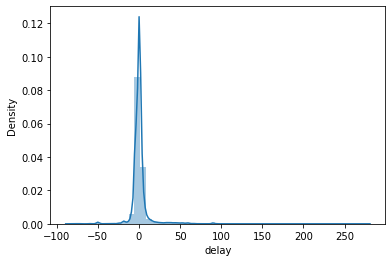

In [49]:
sns.distplot(y)
# we will find the distribution of target column
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence  

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

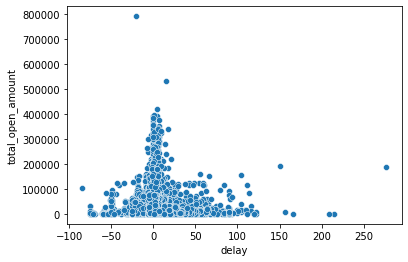

In [50]:
# Check the density of traget variable with various variable in train set
# As we can see it depicts some trend like higher the amount less is the delay
sns.scatterplot(data=train.merge(y_train,on = train.index), x='delay', y='total_open_amount')

<AxesSubplot:xlabel='delay', ylabel='key_0'>

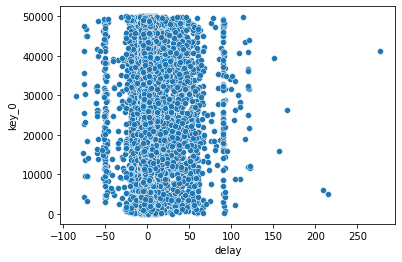

In [51]:
#we can predict any significant relation from this 
#Doesn't have direct relation to target column
sns.scatterplot(data=train.merge(y_train,on = train.index), x='delay', y='key_0')

<AxesSubplot:xlabel='delay', ylabel='doc_id'>

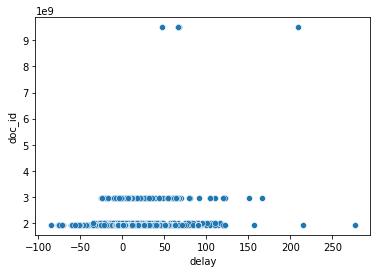

In [52]:
# No significant relation from target column except some values
sns.scatterplot(data=train.merge(y_train,on = train.index), x='delay', y='doc_id')

In [53]:
train.merge(y_train,on=train.index)  ### For a glance

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,1595,U001,0200744019,TARG co,2019-01-11,1928531604.0,2018-12-30,2018-12-31,2018-12-30,2019-01-14,8156.46,2018-12-30,NAA8,-3
1,23335,U001,0200769623,WAL-MAR foundation,2019-01-10,1928542629.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,16987.34,2018-12-30,NAH4,-4
2,29642,U001,0200762301,C&S WH in,2019-01-15,1928541925.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,76132.87,2018-12-30,NAC6,1
3,5544,U001,0200769623,WAL-MAR associates,2019-01-09,1928539490.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,323.72,2018-12-30,NAH4,-5
4,37549,U001,0200769623,WAL-MAR foundation,2019-01-10,1928542619.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,27642.47,2018-12-30,NAH4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29353,13162,U001,0200762301,C&S WH us,2019-11-13,1930054930.0,2019-10-26,2019-10-26,2019-10-26,2019-11-10,128232.52,2019-10-26,NAC6,3
29354,12844,CA02,0140106408,WAL-M us,2019-11-13,2960588393.0,2019-10-26,2019-10-26,2019-10-26,2019-11-06,10945.45,2019-10-27,CA10,7
29355,49087,U001,0200769623,WAL-MAR llc,2019-11-06,1930056012.0,2019-10-27,2019-10-26,2019-10-27,2019-11-11,77214.74,2019-10-27,NAH4,-5
29356,43575,U001,0200726979,BJ'S in,2019-11-12,1930067799.0,2019-10-27,2019-10-29,2019-10-27,2019-11-11,27.60,2019-10-27,NAA8,1


# Feature Engineering

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [55]:
#Creating function to drop the train,val,test columns
def Drop(col, traindf=train, valdf=x_val, testdf=x_test):
    
       traindf.drop(col, inplace=True, axis=1)
       valdf.drop(col, inplace=True, axis=1)
       testdf.drop(col, inplace=True, axis=1)
        
       return traindf, valdf, testdf

In [56]:
CPayterm= LabelEncoder()
CPayterm.fit(train['cust_payment_terms'])
train['CPayterm'] = CPayterm.transform(train['cust_payment_terms'])


In [57]:
# finding what are the new catagories in the validation set
diff = set(x_val['cust_payment_terms'])-set(CPayterm.classes_)

# adding them to the classess variable // 
for items in diff:
    CPayterm.classes_ = np.append(CPayterm.classes_,items)
x_val['CPayterm'] = CPayterm.transform(x_val['cust_payment_terms'])


In [58]:
# finding what are the new catagories in the validation set
diff2 = set(x_test['cust_payment_terms'])-set(CPayterm.classes_)

# adding them to the classess variable // 
for items in diff2:
    CPayterm.classes_ = np.append(CPayterm.classes_,items)
x_test['CPayterm'] = CPayterm.transform(x_test['cust_payment_terms'])

train, x_val, x_test = Drop(['cust_payment_terms'])

In [59]:
Busiicode= LabelEncoder()
Busiicode.fit(train['business_code'])
train['Busiicode'] = Busiicode.transform(train['business_code'])

In [60]:
# finding what are the new catagories in the validation set
diff = set(x_val['business_code'])-set(Busiicode.classes_)

# adding them to the classess variable // 
for items in diff:
    Busiicode.classes_ = np.append(Busiicode.classes_,items)
x_val['Busiicode'] = Busiicode.transform(x_val['business_code'])


In [61]:
# finding what are the new catagories in the validation set
diff2 = set(x_test['business_code'])-set(Busiicode.classes_)

# adding them to the classess variable // 
for items in diff2:
    Busiicode.classes_ = np.append(Busiicode.classes_,items)
x_test['Busiicode'] = Busiicode.transform(x_test['business_code'])

train, x_val, x_test = Drop(['business_code'])

In [62]:
# Remove 'clear_date' column as it has to be predicted 

In [63]:
train, x_val, x_test = Drop(['clear_date'])

In [64]:
def status_check(traindf = train,valdf = x_val,testdf = x_test):
    print(traindf.info())
    print("\n")
    print(traindf.shape,valdf.shape,testdf.shape)
    

In [65]:
# Removing two other columns that is not in use

In [66]:
Cnum= LabelEncoder()
Cnum.fit(train['cust_number'])
train['Cnum'] = Cnum.transform(train['cust_number'])

In [67]:
# finding what are the new catagories in the validation set
diff = set(x_val['cust_number'])-set(Cnum.classes_)

# adding them to the classess variable // 
for items in diff:
    Cnum.classes_ = np.append(Cnum.classes_,items)
x_val['Cnum'] = Cnum.transform(x_val['cust_number'])


In [68]:
# finding what are the new catagories in the test set
diff2 = set(x_test['cust_number'])-set(Cnum.classes_)

# adding them to the classess variable // 
for items in diff2:
    Cnum.classes_ = np.append(Cnum.classes_,items)
x_test['Cnum'] = Cnum.transform(x_test['cust_number'])




In [69]:
train, x_val, x_test = Drop(['cust_number'])

In [70]:
Cname= LabelEncoder()
Cname.fit(train['name_customer'])
train['Cname'] = Cname.transform(train['name_customer'])


In [71]:
# finding what are the new catagories in the validation set
diff = set(x_val['name_customer'])-set(Cname.classes_)

# adding them to the classess variable // 
for items in diff:
    Cname.classes_ = np.append(Cname.classes_,items)
x_val['Cname'] = Cname.transform(x_val['name_customer'])


In [72]:
# finding what are the new catagories in the validation set
diff2 = set(x_test['name_customer'])-set(Cname.classes_)

# adding them to the classess variable // 
for items in diff2:
    Cname.classes_ = np.append(Cname.classes_,items)
x_test['Cname'] = Cname.transform(x_test['name_customer'])




In [73]:
train, x_val, x_test = Drop(['name_customer'])

In [74]:
train['DocD']=train['document_create_date'].dt.day
x_val['DocD']=x_val['document_create_date'].dt.day
x_test['DocD']=x_test['document_create_date'].dt.day

train['DocM']=train['document_create_date'].dt.month
x_val['DocM']=x_val['document_create_date'].dt.month
x_test['DocM']=x_test['document_create_date'].dt.month

train['Docdow']=train['document_create_date'].dt.dayofweek
x_val['Docdow']=x_val['document_create_date'].dt.dayofweek
x_test['Docdow']=x_test['document_create_date'].dt.dayofweek

train['DocQ']=train['document_create_date'].dt.quarter
x_val['DocQ']=x_val['document_create_date'].dt.quarter
x_test['DocQ']=x_test['document_create_date'].dt.quarter

train, x_val, x_test = Drop(['document_create_date'])


In [75]:
#### Removing another column
train, x_val, x_test = Drop(['document_create_date.1'])

In [76]:
#extracting day, month, days of week and quarter
train['PosD']=train['posting_date'].dt.day
x_val['PosD']=x_val['posting_date'].dt.day
x_test['PosD']=x_test['posting_date'].dt.day

train['PosM']=train['posting_date'].dt.month
x_val['PosM']=x_val['posting_date'].dt.month
x_test['PosM']=x_test['posting_date'].dt.month

train['Posdow']=train['posting_date'].dt.dayofweek
x_val['Posdow']=x_val['posting_date'].dt.dayofweek
x_test['Posdow']=x_test['posting_date'].dt.dayofweek

#train['PY']=train['posting_date'].dt.year
#x_val['PY']=x_val['posting_date'].dt.year
#x_test['PY']=x_test['posting_date'].dt.year

train, x_val, x_test = Drop(['posting_date'])
#Dropping the Column using Drop function

In [77]:
train['DD']=train['due_in_date'].dt.day
x_val['DD']=x_val['due_in_date'].dt.day
x_test['DD']=x_test['due_in_date'].dt.day

train['DM']=train['due_in_date'].dt.month
x_val['DM']=x_val['due_in_date'].dt.month
x_test['DM']=x_test['due_in_date'].dt.month

train['DQ']=train['due_in_date'].dt.quarter
x_val['DQ']=x_val['due_in_date'].dt.quarter
x_test['DQ']=x_test['due_in_date'].dt.quarter

#train['DY']=train['due_in_date'].dt.year
#x_val['DY']=x_val['due_in_date'].dt.year
#x_test['DY']=x_test['due_in_date'].dt.year

train, x_val, x_test = Drop(['due_in_date'])

In [78]:
train['BCD']=train['baseline_create_date'].dt.day
x_val['BCD']=x_val['baseline_create_date'].dt.day
x_test['BCD']=x_test['baseline_create_date'].dt.day

train['BCM']=train['baseline_create_date'].dt.month
x_val['BCM']=x_val['baseline_create_date'].dt.month
x_test['BCM']=x_test['baseline_create_date'].dt.month

train['BCdow']=train['baseline_create_date'].dt.dayofweek
x_val['BCdow']=x_val['baseline_create_date'].dt.dayofweek
x_test['BCdow']=x_test['baseline_create_date'].dt.dayofweek

train, x_val, x_test = Drop(['baseline_create_date'])

# Feature Selection

In [79]:
### Checking if any outlier crreated

<AxesSubplot:>

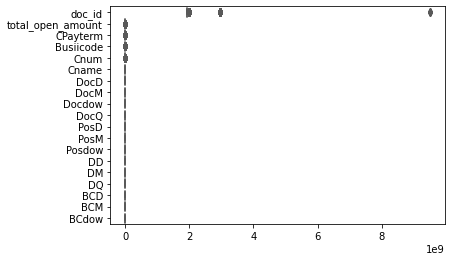

In [80]:
sns.boxplot(data=train,orient='h',palette='Set2')

In [81]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29358 entries, 1595 to 26080
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             29358 non-null  object 
 1   total_open_amount  29358 non-null  float64
 2   CPayterm           29358 non-null  int32  
 3   Busiicode          29358 non-null  int32  
 4   Cnum               29358 non-null  int32  
 5   Cname              29358 non-null  int32  
 6   DocD               29358 non-null  int64  
 7   DocM               29358 non-null  int64  
 8   Docdow             29358 non-null  int64  
 9   DocQ               29358 non-null  int64  
 10  PosD               29358 non-null  int64  
 11  PosM               29358 non-null  int64  
 12  Posdow             29358 non-null  int64  
 13  DD                 29358 non-null  int64  
 14  DM                 29358 non-null  int64  
 15  DQ                 29358 non-null  int64  
 16  BCD                

In [82]:
### Check if any other column needs to be dropped

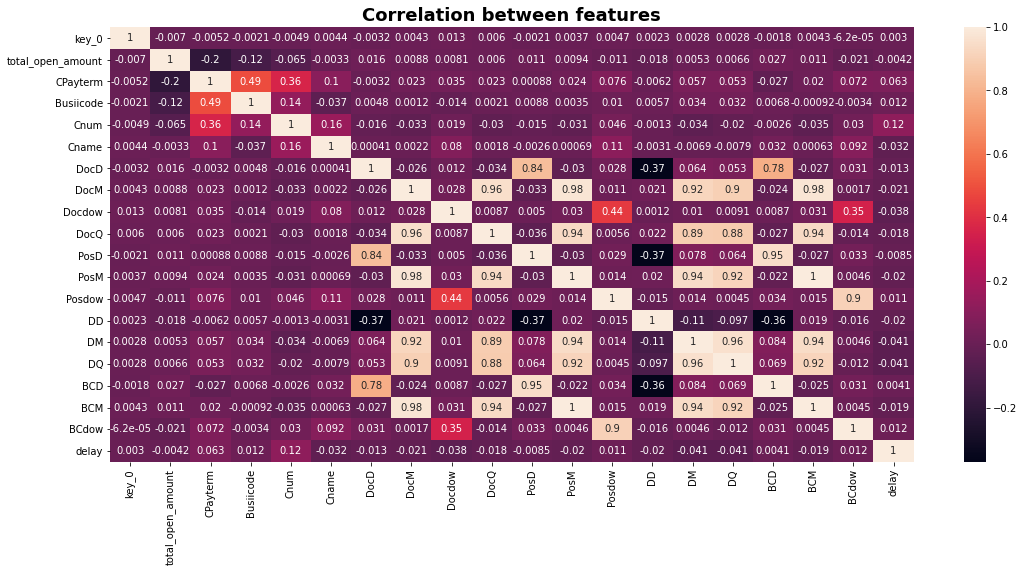

In [83]:
train_corr=train.merge(y_train,on=train.index).corr()
f,ax=plt.subplots(figsize=(18,8))
sns.heatmap(train_corr,cmap=None,annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

# Prediction using models

## Create Base Model

In [84]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import r2_score
sel = VarianceThreshold(0.8)
sel.fit(train)

VarianceThreshold(threshold=0.8)

In [85]:
sel.variances_

array([8.82267757e+16, 1.51889384e+09, 1.24590257e+02, 2.94806384e-01,
       5.75411974e+04, 1.33427326e+06, 7.53970574e+01, 7.99259836e+00,
       3.22487081e+00, 9.12348725e-01, 7.55039750e+01, 7.93606128e+00,
       3.22791427e+00, 7.69426223e+01, 8.08771591e+00, 9.85990174e-01,
       7.74852108e+01, 7.94144158e+00, 3.27062188e+00])

In [86]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=True)
linear_model.fit(train,y_train)
#fitting the model according to our train dataset

LinearRegression(n_jobs=10, normalize=True)

In [87]:
y_pre=linear_model.predict(train)

In [88]:
y_pred=linear_model.predict(x_val)

In [89]:
y_pred2=linear_model.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_pred, squared=False)


7.972388287462525

In [91]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred2, squared=False)

10.684233733539646

In [92]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pre, squared=False)

10.966493516420453

In [93]:
r2_score(y_val,y_pred)

-0.805804623880829

In [94]:
met = pd.DataFrame(zip(y_pred , y_test),columns=['Predicted','Actuals'])
met

,Predicted,Actuals
0,-0.017119,0
1,-3.975358,-2
2,0.021529,-5
3,3.748843,0
4,-2.963234,-2
...,...,...
4888,16.881443,5
4889,14.971169,-3
4890,13.865926,-1
4891,-0.953898,-1


In [95]:
(abs(met.Predicted-met.Actuals)/met.Actuals).median()

0.932113553971563

## Tree Based model

In [96]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(random_state=0 , max_depth=8)

In [97]:
# Fitting Tree Based model Tree to the Training Set
Dtree.fit(train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [98]:
#Appending the Scores For Visualisation

In [99]:
y_predict = Dtree.predict(train)
mean_squared_error(y_train, y_predict, squared=False)

7.679296638903816

In [100]:
y_predict2 = Dtree.predict(x_val)

In [101]:
mean_squared_error(y_val, y_predict2, squared=False)

5.147820428429408

In [102]:
y_predict_test = Dtree.predict(x_test)
mean_squared_error(y_test, y_predict_test, squared=False)

9.848473554122531

In [103]:
r2_score(y_val,y_predict2)

0.2470941807586755

In [104]:
#this model is also giving up some good result 
# but we will look for more models 

## XG Boost 

In [105]:
import xgboost as xgb
XGB = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [106]:
# Fitting XGB Tree to the Training Set
XGB.fit(train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [107]:
XGP = XGB.predict(x_val)

In [108]:
#Appending the Scores For Visualisation

In [109]:
mean_squared_error(y_val, XGP, squared=False)

5.247550343430756

In [110]:
XGP = XGB.predict(x_test)

In [111]:
mean_squared_error(y_test, XGP, squared=False)

10.025738029826133

In [112]:
#it has also given up the rmse value which is quite similar to tree based model


# Random Forest Regressor

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
grid_search = RandomForestRegressor(n_jobs=10,max_depth=8,n_estimators=50,random_state=42)


In [114]:
## Fitting Random Forest Regressor Tree to the Training Set
grid_result= grid_search.fit(train, y_train)

In [115]:
### grid_search = GridSearchCV(grid_search,train,cv=5, scoring='accuracy',n_jobs=-1)

In [116]:
Pt=grid_result.predict(train)

In [117]:
#Appending the Scores For Visualisation

In [118]:
mean_squared_error(y_train, Pt, squared=False)

7.592753079644444

In [119]:
Ptest=grid_result.predict(x_test)
mean_squared_error(y_test, Ptest, squared=False)

10.018951388290231

In [120]:
Pval=grid_result.predict(x_val)
mean_squared_error(y_val, Pval, squared=False)

7.243505525002149

In [121]:
r2_score(y_test,Ptest)

0.2004398759768461

In [122]:
### Error is low so we'll move to application of this model on the Main Test set
### we will use random forest regressor

## Applying it to the Original Test set

In [123]:
##main_test in same format

In [124]:
X.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9692
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [125]:
# We have to convert or use same procedures to convert the main test as we did for train,val,test data sets
# To be able to run with the model
main_test=X.drop(['clear_date'], axis=1)
X.shape


(9692, 17)

In [126]:
main_test.shape

(9692, 16)

In [127]:
Tunique=main_test.nunique()
#tunique=x_test.nunique()
Tdrop=Tunique[nunique<=2].index
## columns removed from test set are => 'buisness_year', 'invoice_currency', 'document type', 'isOpen'
main_test= main_test.drop(Tdrop, axis = 1)
main_test.shape,Tunique, Tdrop

((9692, 12),
 business_code                5
 cust_number                658
 name_customer             1741
 buisness_year                1
 doc_id                    9692
 posting_date                84
 document_create_date        88
 document_create_date.1      84
 due_in_date                127
 invoice_currency             2
 document type                1
 total_open_amount         9034
 baseline_create_date        85
 cust_payment_terms          43
 invoice_id                9692
 isOpen                       1
 dtype: int64,
 Index(['buisness_year', 'invoice_currency', 'document type', 'isOpen'], dtype='object'))

In [128]:
# same encoding used earlier
# we have to just encode it in same terms to be ready to processing in a model
CPayterm= LabelEncoder()
CPayterm.fit(main_test['cust_payment_terms'])
main_test['CPayterm'] = CPayterm.transform(main_test['cust_payment_terms'])

In [129]:
main_test.drop(['cust_payment_terms'],inplace=True,axis=1)

In [130]:

Busiicode= LabelEncoder()
Busiicode.fit(main_test['business_code'])
main_test['Busiicode'] = Busiicode.transform(main_test['business_code'])

main_test.drop(['business_code'],inplace=True,axis=1)

In [131]:

Cnum= LabelEncoder()
Cnum.fit(main_test['cust_number'])
main_test['Cnum'] = Cnum.transform(main_test['cust_number'])


In [132]:
main_test.drop(['cust_number'],inplace=True,axis=1)

In [133]:
Cname= LabelEncoder()
Cname.fit(main_test['name_customer'])
main_test['Cname'] = Cname.transform(main_test['name_customer'])



In [134]:
main_test.drop(['name_customer'],inplace=True,axis=1)

In [135]:
main_test['DocD']=main_test['document_create_date'].dt.day
main_test['DocM']=main_test['document_create_date'].dt.month
main_test['Docdow']=main_test['document_create_date'].dt.dayofweek
main_test['DocQ']=main_test['document_create_date'].dt.quarter

main_test.drop(['document_create_date'],inplace=True,axis=1)

In [136]:
main_test['PosD']=main_test['posting_date'].dt.day
main_test['PosM']=main_test['posting_date'].dt.month
main_test['Posdow']=main_test['posting_date'].dt.dayofweek
#main_test['PY']=main_test['posting_date'].dt.year

main_test.drop(['posting_date'],inplace=True,axis=1)

In [137]:
main_test['DD']=main_test['due_in_date'].dt.day
main_test['DM']=main_test['due_in_date'].dt.month
#main_test['Ddow']=main_test['due_in_date'].dt.dayofweek
main_test['DQ']=main_test['due_in_date'].dt.quarter
#main_test['DY']=main_test['due_in_date'].dt.year

main_test.drop(['due_in_date'],inplace=True,axis=1)

In [138]:
main_test['BCD']=main_test['baseline_create_date'].dt.day
main_test['BCM']=main_test['baseline_create_date'].dt.month
main_test['BCdow']=main_test['baseline_create_date'].dt.dayofweek

main_test.drop(['baseline_create_date'],inplace=True,axis=1)

In [139]:
main_test.drop(['invoice_id'],inplace=True,axis=1)
main_test['doc_id'] = main_test['doc_id'].apply(float)
main_test['total_open_amount'] = main_test['total_open_amount'].apply(float)

In [140]:
main_test.drop(['document_create_date.1'],inplace=True,axis=1)

In [141]:
# We have implemented all the steps as we did earlier
# It is required to do so because of input must be same
# And to get the desired  result we must cross check it

## Prediction using Random Forest Regressor

In [142]:
 X['RESULT']=grid_result.predict(main_test)
# Now we have given our main test dataset as input in our choosed model
# As Random Forest 

In [143]:
 X['RESULT']=(round(X['RESULT'])).apply(int)


In [144]:
 X['RESULT'].min(), X['RESULT'].max()
# checking the min and max

(-19, 64)

In [145]:
 X['predicted'] = X['due_in_date'] + pd.to_timedelta(X['RESULT'], unit='D')
# creating a predicted column by adding due date and our target column or delay
# now we got our predicted date

In [146]:
 X

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,RESULT,predicted
2,U001,0200744019,TARG co,NaT,2020.0,1930709578.0,2020-03-27,2020-03-27,2020-03-27,2020-04-11,USD,RV,18118.48,2020-03-27,NAA8,1930709578.0,1,-2,2020-04-09
5,U001,0200726979,BJ'S in,NaT,2020.0,1930789171.0,2020-04-16,2020-04-15,2020-04-16,2020-05-01,USD,RV,199.08,2020-04-16,NAA8,1930789171.0,1,-1,2020-04-30
10,U001,0200759878,SA in,NaT,2020.0,1930675576.0,2020-03-21,2020-03-20,2020-03-21,2020-04-05,USD,RV,17602.54,2020-03-21,NAH4,1930675576.0,1,2,2020-04-07
13,U001,0200762301,C&S WH co,NaT,2020.0,1930709317.0,2020-03-28,2020-03-27,2020-03-28,2020-04-12,USD,RV,3578.12,2020-03-28,NAC6,1930709317.0,1,2,2020-04-14
15,U001,0200418007,AM corporation,NaT,2020.0,1930838503.0,2020-05-04,2020-05-04,2020-05-04,2020-05-19,USD,RV,2399.86,2020-05-04,NAA8,1930838503.0,1,-2,2020-05-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49965,U001,0200780383,MEIJ associates,NaT,2020.0,1930778760.0,2020-04-13,2020-04-13,2020-04-13,2020-04-28,USD,RV,1373.96,2020-04-13,NAA8,1930778760.0,1,-2,2020-04-26
49971,U001,0200769623,WAL-MAR,NaT,2020.0,1930766199.0,2020-04-10,2020-04-08,2020-04-10,2020-04-25,USD,RV,13011.36,2020-04-10,NAH4,1930766199.0,1,2,2020-04-27
49993,U001,0200799367,MCL co,NaT,2020.0,1930752882.0,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,79625.69,2020-04-07,NAA8,1930752882.0,1,-1,2020-04-21
49994,U001,0200762301,C&S WH associates,NaT,2020.0,1930834011.0,2020-04-29,2020-04-28,2020-04-29,2020-05-14,USD,RV,61205.39,2020-04-29,NAC6,1930834011.0,1,3,2020-05-17


In [147]:
##bucketing the datsets to specific sets
X.loc[X['RESULT']<-15,'bucket'] ="<-15"
X.loc[(X['RESULT']>=-15) & (X['RESULT']<0),'bucket'] = "-15-0"
X.loc[(X['RESULT']>=0) & (X['RESULT']<15),'bucket'] = "0-14"
X.loc[(X['RESULT']>=15) & (X['RESULT']<30),'bucket'] = "15-29"
X.loc[(X['RESULT']>=30) & (X['RESULT']<45),'bucket'] = "30-44"
X.loc[(X['RESULT']>=45) & (X['RESULT']<60),'bucket'] = "45-59"
X.loc[(X['RESULT']>=60) & (X['RESULT']<75),'bucket'] = "60-74"
X.loc[(X['RESULT']>=75),'bucket'] =">=75"

X['bucket'].value_counts()
#checking the counts for all the buckets
#how much each buckets carry values 


0-14     4815
-15-0    4413
30-44     355
15-29      55
<-15       36
45-59      17
60-74       1
Name: bucket, dtype: int64

In [148]:
  X
##output as all the columns 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,RESULT,predicted,bucket
2,U001,0200744019,TARG co,NaT,2020.0,1930709578.0,2020-03-27,2020-03-27,2020-03-27,2020-04-11,USD,RV,18118.48,2020-03-27,NAA8,1930709578.0,1,-2,2020-04-09,-15-0
5,U001,0200726979,BJ'S in,NaT,2020.0,1930789171.0,2020-04-16,2020-04-15,2020-04-16,2020-05-01,USD,RV,199.08,2020-04-16,NAA8,1930789171.0,1,-1,2020-04-30,-15-0
10,U001,0200759878,SA in,NaT,2020.0,1930675576.0,2020-03-21,2020-03-20,2020-03-21,2020-04-05,USD,RV,17602.54,2020-03-21,NAH4,1930675576.0,1,2,2020-04-07,0-14
13,U001,0200762301,C&S WH co,NaT,2020.0,1930709317.0,2020-03-28,2020-03-27,2020-03-28,2020-04-12,USD,RV,3578.12,2020-03-28,NAC6,1930709317.0,1,2,2020-04-14,0-14
15,U001,0200418007,AM corporation,NaT,2020.0,1930838503.0,2020-05-04,2020-05-04,2020-05-04,2020-05-19,USD,RV,2399.86,2020-05-04,NAA8,1930838503.0,1,-2,2020-05-17,-15-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49965,U001,0200780383,MEIJ associates,NaT,2020.0,1930778760.0,2020-04-13,2020-04-13,2020-04-13,2020-04-28,USD,RV,1373.96,2020-04-13,NAA8,1930778760.0,1,-2,2020-04-26,-15-0
49971,U001,0200769623,WAL-MAR,NaT,2020.0,1930766199.0,2020-04-10,2020-04-08,2020-04-10,2020-04-25,USD,RV,13011.36,2020-04-10,NAH4,1930766199.0,1,2,2020-04-27,0-14
49993,U001,0200799367,MCL co,NaT,2020.0,1930752882.0,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,79625.69,2020-04-07,NAA8,1930752882.0,1,-1,2020-04-21,-15-0
49994,U001,0200762301,C&S WH associates,NaT,2020.0,1930834011.0,2020-04-29,2020-04-28,2020-04-29,2020-05-14,USD,RV,61205.39,2020-04-29,NAC6,1930834011.0,1,3,2020-05-17,0-14


In [157]:
X.to_csv('H2HBABBA2568_.predicted.csv')

In [153]:
X.drop(['document_create_date.1'],inplace=True,axis=1)
X.drop(['business_code'],inplace=True,axis=1)
X.drop(['clear_date'],inplace=True,axis=1)
X.drop(['buisness_year'],inplace=True,axis=1)
X.drop(['doc_id'],inplace=True,axis=1)
X.drop(['posting_date'],inplace=True,axis=1)
X.drop(['document_create_date'],inplace=True,axis=1)
X.drop(['invoice_currency'],inplace=True,axis=1)
X.drop(['document type'],inplace=True,axis=1)
X.drop(['baseline_create_date'],inplace=True,axis=1)
X.drop(['cust_payment_terms'],inplace=True,axis=1)
X.drop(['isOpen'],inplace=True,axis=1)
X.drop(['RESULT'],inplace=True,axis=1)


KeyError: "['document_create_date.1'] not found in axis"

In [150]:
# Checking our distinct values in each columns
unique=X.nunique()
unique

business_code                5
cust_number                658
name_customer             1741
clear_date                   0
buisness_year                1
doc_id                    9692
posting_date                84
document_create_date        88
document_create_date.1      84
due_in_date                127
invoice_currency             2
document type                1
total_open_amount         9034
baseline_create_date        85
cust_payment_terms          43
invoice_id                9692
isOpen                       1
RESULT                      64
predicted                  135
bucket                       7
dtype: int64

In [155]:
X.drop(['RESULT'],inplace=True,axis=1)

In [156]:
X

,cust_number,name_customer,due_in_date,total_open_amount,invoice_id,predicted,bucket
2,0200744019,TARG co,2020-04-11,18118.48,1930709578.0,2020-04-09,-15-0
5,0200726979,BJ'S in,2020-05-01,199.08,1930789171.0,2020-04-30,-15-0
10,0200759878,SA in,2020-04-05,17602.54,1930675576.0,2020-04-07,0-14
13,0200762301,C&S WH co,2020-04-12,3578.12,1930709317.0,2020-04-14,0-14
15,0200418007,AM corporation,2020-05-19,2399.86,1930838503.0,2020-05-17,-15-0
...,...,...,...,...,...,...,...
49965,0200780383,MEIJ associates,2020-04-28,1373.96,1930778760.0,2020-04-26,-15-0
49971,0200769623,WAL-MAR,2020-04-25,13011.36,1930766199.0,2020-04-27,0-14
49993,0200799367,MCL co,2020-04-22,79625.69,1930752882.0,2020-04-21,-15-0
49994,0200762301,C&S WH associates,2020-05-14,61205.39,1930834011.0,2020-05-17,0-14


In [158]:
X('invoice_id').nunique()

TypeError: 'DataFrame' object is not callable

In [159]:
X.dtypes

cust_number                  object
name_customer                object
due_in_date          datetime64[ns]
total_open_amount            object
invoice_id                   object
predicted            datetime64[ns]
bucket                       object
dtype: object